In this blog post, I will use the Seaborn Diamonds dataset to predict the price of a diamond based on various features of that diamond, like color, cut, and depth. Through this exercise, I hope to learn which features of a diamond contribute most to its price. 

# Get and Examine the Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# sns.get_dataset_names()
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let's examine the columns and their data types. We will also check for null and missing values. 

In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
# Check for any null values. 
diamonds.isna().any().any()

False

Looks like this dataset doesn't contain any null values, so we don't have to interpolate missing values. 

In [4]:
# Let's find the minimum and maximum price for any individual diamond. 
[diamonds['price'].min(), diamonds['price'].max()]

[326, 18823]

It appears the price of the diamonds is in a very large range. The price varies from a couple hundred dollars on the low-end to around $19K on the high end

Let's get a better sense for the price variability by plotting the diamond price via a histogram. 

<AxesSubplot:xlabel='price', ylabel='Count'>

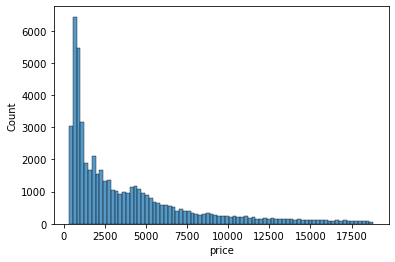

In [5]:
sns.histplot(data=diamonds, x="price")

This visualization gives us further insight into the price of the diamonds. It seems that most of the diamonds are on the low end, but there are a few very expensive diamonds. The distribution can be described as being right skewed.  

Now, let's identify which factors most affect a given diamond's price. First, let's identify what factor the diamond carat (weight) has on price. We can visualize this relationship through a scatterplot. 

<AxesSubplot:xlabel='carat', ylabel='price'>

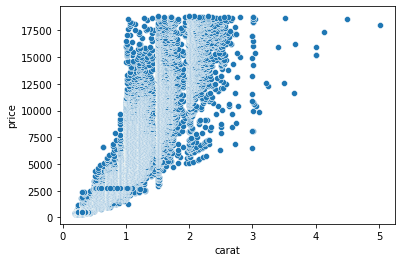

In [10]:
sns.scatterplot(data=diamonds, x="carat", y="price")

It seems there is a lot of noise that degrades the quality of the plot. There is a lot of variation in price, especially for smaller carat values. However, there could be a positive relationship between carat value and price. Most likely, we will need to combine the diamond's weight with other features of the diamond in order to help determine the price. 

Now, let's try to see if the cut quality affects price. We can examine this through a bar chart. 

<AxesSubplot:xlabel='cut', ylabel='price'>

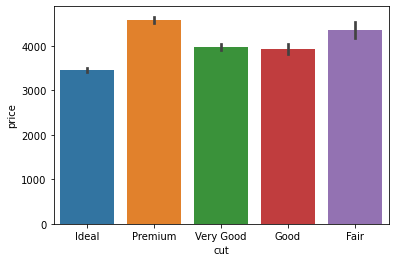

In [7]:
sns.barplot(data=diamonds, x="cut", y="price")

Interestingly, it appears that the quality of the cut doesn't have much to do with the price. In fact, ideal cuts appear to have the lowest aggregated price. 

Let's also examine if the color of the diamond is a good predictor of price. 

<AxesSubplot:xlabel='color', ylabel='price'>

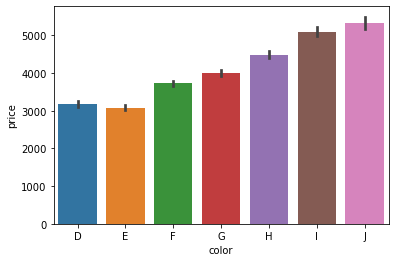

In [8]:
sns.barplot(data=diamonds, x="color", y="price")

Here, we see that as the color changes from D (worst) to J (best), the price tends to increase. 

## Constructing Linear Model

Now, we are ready to create a linear model, which will allow us to predict the price of a diamond given its color, clarity, depth, etc.